In [64]:
import sys
sys.path.append('D:/UNESP/EngMec-UNESP/')
import frankenstein as fk

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.unumpy as un
import ZebraLib as zb

## Tubo de prandtl

In [65]:
#medidas do tubo
y =  np.array([12.65, 8.75, 6.35, 4.95, 3.4, 0, -3.4, -4.95, -6.35, -8.75, -12.65, ])/1000

df_tubo = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. Mec Flu II/Lab 2 - Perfil velocidade/dados2.xlsx', 
                        sheet_name='tubo', index_col=0)
#print(df_tubo.T.to_latex(index=False))

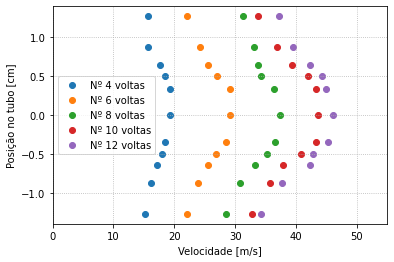

In [66]:
#%matplotlib
fig, ax = plt.subplots()
ax.set(xlabel='Velocidade [m/s]', ylabel='Posição no tubo [cm]', xlim=(0, 55))
vv = np.array([4, 6, 8, 10, 12])

for i in range(5):
    v = fk.h2v(df_tubo.T[i+1].values)
    ax.scatter(v, y*100, label=f'Nº {vv[i]} voltas')
ax.grid(ls='dotted')
ax.legend()

fig.savefig('perfil_vel.pdf', bbox_inches='tight')

In [67]:
def Re(v):
    nu = 1.5e-5
    D = 0.038925*2
    return (v*D)/nu

def calc_velocidade(index):
    y =  np.array([12.65, 8.75, 6.35, 4.95, 3.4, 0, -3.4, -4.95, -6.35, -8.75, -12.65, ])/1000
    vp = fk.h2v(df_tubo.T[index].values)

    r = 0.038925
    Q = -2*np.pi*r*zb.integral(vp, y, y.min(), y.max())
    A = np.pi*r**2
    return Q/A

tubo_Vmed = []
for i in range(1, 6):
    print(f'Nº voltas {vv[i-1]} --- vel média {calc_velocidade(i):.2f} m/s --- Re {Re(calc_velocidade(i)):.2f}')
    tubo_Vmed.append(calc_velocidade(i))
    
tubo_Vmed = np.array(tubo_Vmed) #velocidade média pela integração do persil de velocidade

Nº voltas 4 --- vel média 16.32 m/s --- Re 84693.28
Nº voltas 6 --- vel média 24.45 m/s --- Re 126912.86
Nº voltas 8 --- vel média 31.56 m/s --- Re 163777.67
Nº voltas 10 --- vel média 36.92 m/s --- Re 191620.02
Nº voltas 12 --- vel média 39.14 m/s --- Re 203143.80


## Placa de ofício

In [68]:
## Placa de oficio
df_placa = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. Mec Flu II/Lab 2 - Perfil velocidade/dados2.xlsx', 
                        sheet_name='placa', index_col=0)
df_placa

,delta_h
medida,
1,10.0
2,17.0
3,21.7
4,23.9
5,25.1


In [69]:
placa_Vmed = fk.calc_vazão(df_placa['delta_h'].values)[2]
placa_Vmed

array([12.37984371, 16.07593137, 18.13326303, 19.01877485, 19.48456521])

In [70]:
res = pd.DataFrame({'tubo_v':tubo_Vmed, 'tubo_Re':Re(tubo_Vmed), 'placa_v':placa_Vmed, 'placa_Re':Re(placa_Vmed)})
res

,tubo_v,tubo_Re,placa_v,placa_Re
0,16.318551,84693.280040,12.379844,64251.388834
1,24.453345,126912.859179,16.075931,83434.083833
2,31.556392,163777.674518,18.133263,94111.635136
3,36.921006,191620.019383,19.018775,98707.441481
4,39.141388,203143.801849,19.484565,101124.893454


In [71]:
print(res.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
   tubo\_v &       tubo\_Re &   placa\_v &      placa\_Re \\
\midrule
16.318551 &  84693.280040 & 12.379844 &  64251.388834 \\
24.453345 & 126912.859179 & 16.075931 &  83434.083833 \\
31.556392 & 163777.674518 & 18.133263 &  94111.635136 \\
36.921006 & 191620.019383 & 19.018775 &  98707.441481 \\
39.141388 & 203143.801849 & 19.484565 & 101124.893454 \\
\bottomrule
\end{tabular}



In [72]:
#comparativo das vazões medidas
r = 0.038925
A = np.pi*r**2

res = pd.DataFrame({'tubo':tubo_Vmed*A, 'placa':placa_Vmed*A})
res['err'] = abs(res['placa'] - res['tubo'])/res['tubo']*100
res

,tubo,placa,err
0,0.077676,0.058928,24.136379
1,0.116398,0.076521,34.258763
2,0.150208,0.086314,42.536957
3,0.175744,0.090529,48.487928
4,0.186313,0.092747,50.220045
